In [2]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 5
x = np.arange(0, 300, delta)
y = np.arange(0, 300, delta)
X, Y = np.meshgrid(x, y)

f = 100 * X**(3/4) * Y**(1/4)
g = 200*X + 250*Y - 50000

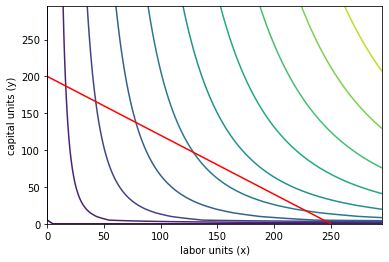

In [4]:
fig, ax = plt.subplots()
ax.contour(X, Y, f, 10)
ax.contour(X, Y, g, [0], colors=["red"])
plt.xlabel("labor units (x)")
plt.ylabel("capital units (y)")
plt.show()

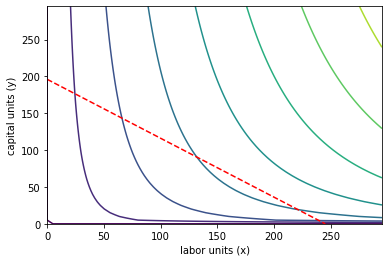

In [21]:
fig, ax = plt.subplots()
ax.contour(X, Y, f)
ax.contour(X, Y, g, levels=[-1000], colors=["red"])
plt.xlabel("labor units (x)")
plt.ylabel("capital units (y)")
plt.show()